# Питон и машинное обучение

# Модуль 3. Метрики качества

Метрики качества в задачах машинного обучения с учителем:

- Количественные метрики: 
    - MSE и MAE (mean square error, mean absolute error)
    - R2
- confusion matrix (матрица ошибок)
- accuracy, precision, recall, f-мера
- Кривая ROC и метрика AUC
- Кривая Precision/Recall


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import auc
from sklearn.metrics import precision_recall_curve

%matplotlib inline

In [ ]:
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('always', category=UserWarning)

## Метрики

### Количественные метрики

Метрики качества, основанные на вычислении разности между предсказанным результатом и истиной:

MAE - mean absolute error: 

$MAE = \frac{1}{n} * \sum_{i=1}^{n}|a(x_i)-y_i|$

MSE - mean squared error:

$MSE = \frac{1}{n} * \sum_{i=1}^{n}(a(x_i)-y_i)^2$

RMSE - root mean squared error:

$RMSE = \sqrt{\frac{1}{n} * \sum_{i=1}^{D}(a(x_i)-y_i)^2}$

Эти метрики можно использовать для сравнения качества работы моделей, а также использовать их как функции потерь.

In [ ]:
from sklearn.datasets import load_digits

digits = load_digits()
X, y = digits.data, digits.target

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                   test_size=0.3, 
                                                   random_state=20231110,
                                                   stratify = y)

X_test_digits = X_test
y_test_digits = y_test
print(X_train.shape)
print(X_test_digits.shape)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

cls1 = RandomForestClassifier(n_estimators=3, max_depth=5, n_jobs=-1) 
cls1.fit(X_train,y_train)

pred_cls1 = cls1.predict(X_test)
pred_cls1[:20]

In [ ]:
cls2 = RandomForestClassifier(n_estimators=40, max_depth=20, n_jobs=-1) 
cls2.fit(X_train,y_train)

pred_cls2 = cls2.predict(X_test)
pred_cls2[:20]

In [ ]:
y_test[:20]

In [ ]:
from sklearn.metrics import mean_squared_error

print(f"MSE value Classifier 1: {mean_squared_error(y_test, pred_cls1)}")
print(f"MSE value Classifier 2: {mean_squared_error(y_test, pred_cls2)}")
print()

### R2-метрика или коэффициент детерминации

Ее можно считать нормированной среднеквадратичной ошибкой.

$R^2 = 1 - \frac{\sum_{i=1}^{n}(x_i-y_i)^2}{{\sum_{i=1}^{n}(y_i-\overline{y})^2}}$

здесь $\overline{y} = \frac{1}{n} * \sum_{i=1}^{n}y_i$ - среднее значение целевой переменной из контрольной выборки.

Если R2 метрика близка к 1, значит модель хорошо объясняет данные. Если R2 близка к нулю или отрицательным значениям - это значит, что модель обучена плохо.

In [ ]:
from sklearn.metrics import r2_score

print(f"R2 value Classifier 1: {r2_score(y_test, pred_cls1)}")
print(f"R2 value Classifier 2: {r2_score(y_test, pred_cls2)}")
print()

## Метрики в задачах классификации

## Матрица ошибок

Она же __confusion matrix__ или __матрица точности и полноты__.

Для задачи классификации по n классам ее можно сформировать и визуализировать следющим образом:

In [ ]:
cf_matrix = confusion_matrix(y_test, pred_cls1, labels=np.arange(10))

cf_matrix

In [ ]:
plt.figure(figsize=(10,9))

ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

ax.set_ylabel('Correct value')
ax.set_xlabel('Predicted value')
plt.title(f"Confusion matrix for {y_test.shape[0]} expriments")
plt.show()

In [ ]:
plt.figure(figsize=(10,9))

ax = sns.heatmap(cf_matrix/np.sum(cf_matrix, axis=1), annot=True, 
            fmt='.2%', cmap='Blues')

ax.set_ylabel('Correct value')
ax.set_xlabel('Predicted value')
ax.set_title("Confusion matrix in %% shares of control value class count")
plt.show()

#### ⁉️ Задание

Для датасета "glass.csv" обучите классификатор "Случайный лес" с рандомными параметрами и постройте confutsion matrix.

Атрибуты датасета:
```
1. Id number: 1 to 214
2. RI: refractive index
3. Na: Sodium (unit measurement: weight percent in corresponding oxide, as 
              are attributes 4-10)
4. Mg: Magnesium
5. Al: Aluminum
6. Si: Silicon
7. K: Potassium
8. Ca: Calcium
9. Ba: Barium
10. Fe: Iron
11. Type of glass: (class attribute)
  -- 1 building_windows_float_processed
  -- 2 building_windows_non_float_processed
  -- 3 vehicle_windows_float_processed
  -- 4 vehicle_windows_non_float_processed (none in this database)
  -- 5 containers
  -- 6 tableware
  -- 7 headlamps
```



In [ ]:
columns = ["Id", "RI", "Na", "Mg", "Al", "Si", "K", "Ca", "Ba", "Fe", "Type of glass", ]
# ваш код здесь



## Метрика Accuracy

Доля правильных ответов из всех ответов классификатора:

$Accuracy = \frac{TP+TN}{TP+TN+FP+FN}$


Возьмем датасет "credit_scoring.csv"

In [ ]:
df_scoring = pd.read_csv('data/credit_scoring.csv', index_col='client_id')
df_scoring.NumDependents.fillna( 0, inplace=True )
df_scoring.Income.fillna( df_scoring.Income.median(), inplace=True )
print(df_scoring.isnull().sum())
df_scoring

In [ ]:
df_scoring.describe()

In [ ]:
from sklearn.ensemble import RandomForestClassifier

y = df_scoring['Delinquent90']
X = df_scoring.drop(columns=['Delinquent90'])

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=42,
                                                   stratify=y)

forest = RandomForestClassifier(n_estimators=4, max_depth=7, n_jobs=-1) 
forest.fit(X_train,y_train)

y_pred = forest.predict(X_test)
print(f"Accuracy score: {accuracy_score(y_test, y_pred)}")

In [ ]:
labels = [1,0]
labels_txt = ['TP', 'FN', 'FP', 'TN']
cf_matrix = confusion_matrix(y_test, y_pred, 
                             labels=labels,
                            normalize='all')

plt.figure(figsize=(5,4.5))

annot = np.array([f"{item:.2%}\n{descr}" \
                   for item, descr in zip(cf_matrix.flatten(), 
                                          labels_txt)]).reshape((2,2))

ax = sns.heatmap(cf_matrix, annot=annot, fmt='',
                 xticklabels=labels,
                 yticklabels=labels,
                 cmap='Blues')

ax.set_ylabel('Correct value')
ax.set_xlabel('Predicted value')
plt.title(f"Confusion matrix")
plt.show()


### Метрики Precision, Recall, F1

$Precision = \frac{TP}{TP+FP}$

__Precision__ - это доля положительных предсказаний классификатора из всех положительных значений контрольной выборки.

$Recall = \frac{TP}{TP+FN}$

__Recall__ - это доля правильно указанных положительных результатов из всех положительных предсказаний классификатора.

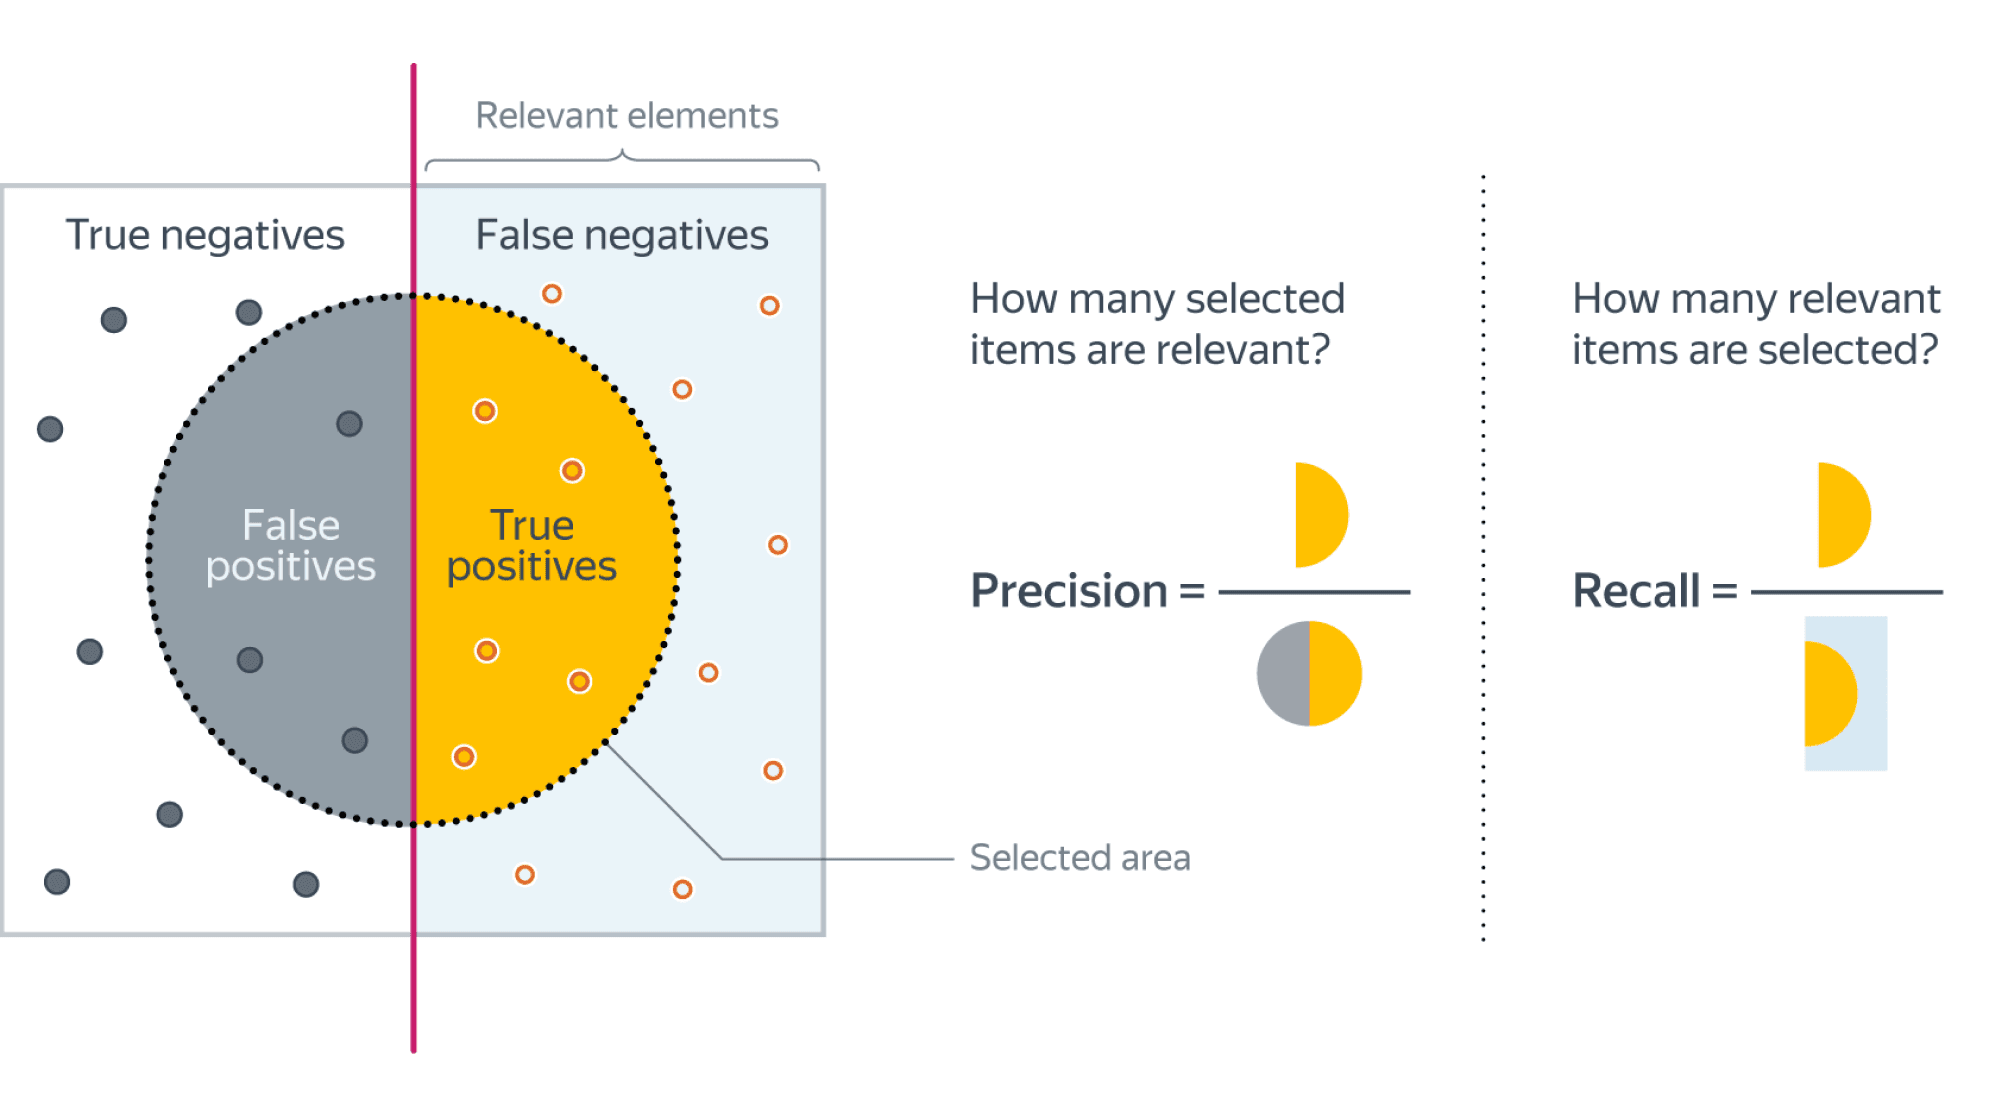

Среднее гармоническое этих метрик - метрика F1. 

$F1 = \frac{2*Precision*Recall}{Precision+Recall} = \frac{2*TP}{2*TP+FP+FN}$

Если метрика F1 близка к 1 - алгоритм работает хорошо. Если к 0 - требуется дополнительная настройка.

In [ ]:
print(f"Precision score: {precision_score(y_test, y_pred)}")
print(f"Recall score: {recall_score(y_test, y_pred)}")
print(f"F1 score: {f1_score(y_test, y_pred)}")

In [ ]:
# обучим более сильный "лес", с учетом разбалансировки классов:
forest = RandomForestClassifier(class_weight={0: 1, 1: 13}, max_depth=12, n_estimators=40) 
forest.fit(X_train,y_train)

y_pred = forest.predict(X_test)

print(f"Accuracy score: {accuracy_score(y_test, y_pred)}")
print(f"Precision score: {precision_score(y_test, y_pred)}")
print(f"Recall score: {recall_score(y_test, y_pred)}")
print(f"F1 score: {f1_score(y_test, y_pred)}")

In [ ]:
cf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred, 
                             labels=labels,
                            normalize='pred')

plt.figure(figsize=(5,4.5))

annot = np.array([f"{item:.2%}\n{descr}" \
                   for item, descr in zip(cf_matrix.flatten(), 
                                          labels_txt)]).reshape((2,2))


ax = sns.heatmap(cf_matrix, annot=annot, fmt='',
                 xticklabels=labels,
                 yticklabels=labels,
                 cmap='Blues')

ax.set_ylabel('Control value')
ax.set_xlabel('Predicted value')
plt.title(f"Confusion matrix")
plt.show()

### Порог предсказания класса и метрика ROC/AUC

Получить вектора вероятности принадлежности к соответствующим классам можно при помощи функции ```predict_proba()```:

In [ ]:
# для бинарной классификации
y_pred_proba = forest.predict_proba(X_test)
y_pred_proba

In [ ]:
# для многклассовой классификации
y_pred_digits = cls2.predict(X_test_digits)
y_pred_proba_digits = cls2.predict_proba(X_test_digits)
print(y_pred_digits[:3])
y_pred_proba_digits[:3]

Вводим понятие "порог определения класса": значение вероятности, при котором мы относим экземпляр выборки к тому или иному классу. Пороговое значение вероятности будет варьироваться от 0 к 1.

Также вводим следующие метрики: 

$TPR = \frac{TP}{P} = \frac{TP}{TP+FN}$

__TPR__ (True Positive Rate) - это доля положительных объектов, правильно предсказанных предсказанных положительными.

$FPR = \frac{FP}{N} = \frac{FP}{FP+TN}$

__FPR__ (False Positive Rate) - это доля отрицательных объектов, неправильно предсказанных положительными.

При варьировании порогового значения вероятности можно получить множество точек зависимости TPR от FPR и построить график. Такая кривая носит название __Receiver Operating Characteristics__ curve или __ROC__.

In [ ]:
fpr, tpr, _ = roc_curve(y_test, y_pred_proba[:,1])

plt.plot(fpr, tpr, label="Credit scoring model");
plt.plot([0,1], [0,1], '--', label='No model')
plt.xlabel('FPR'); plt.ylabel('TPR'); plt.axis([-0.05,1.05,-0.05,1.05]); plt.legend()
plt.show()

Площадь под графиком позволяет получить количественную оценку работы классификатора, эта характеристика носит название __AUC__ (Area Under Curve). 

Лучшее значение для показателя __AUC = 1__.

Если значение AUC близко к __0.5__ - предсказания модели ни чем отличаются от генератора случайных значений.

Если значение AUC __менее 0.5__  и график ROC вогнут под диагональ - возможно, имеет место ошибка нанесения меток класса.

In [ ]:
print(f"AUC score: {roc_auc_score(y_test, y_pred)}")

#### ⁉️ Задание

Для датасета ```data/voice.csv``` обучите классификатор "Случайный лес" с рандомными параметрами, получите значение следующих метрик:
- Accuracy
- Precision
- Recall
- f1
- AUC

Постройте график ROC. 

Попробуйте улучшить модель (увеличив количество деревьев и/или их глубину). Повторно вычислите метрики.


In [ ]:
# ваш код здесь






### ROC/AUC для задач классификации по множеству классов

Здесь есть два подхода:
- __OvR__ - "Ove versus Rest" - где рассматриваются вероятности предсказания объектов одного класса отночисительно всех остальных классов.
- __OvO__ - "One versus One" - здесь рассматриваются вероятности предсказания объектов одного класса односительно другого.

Оба подхода заключаются в приведении данных классификации к бинарному виду. Кратко рассмотрим эти подходы на примере "рукописных цифр".

#### OVR

Для того, чтобы выполнить оценки One-vs-Rest нам нужно получить вектора ответов по интересующему нас классу и выполнить one-hot для контрольных данных:

In [ ]:
y_test_digits_matrix = pd.get_dummies(y_test_digits, dtype=np.int64).to_numpy()
y_test_digits_matrix

In [ ]:
y_pred_digits = cls1.predict(X_test_digits) # используем "плохой классификатор"
y_pred_proba_digits = cls1.predict_proba(X_test_digits) # используем "плохой классификатор"
y_pred_proba_digits

In [ ]:
classes_ = [0, 1, 8, 4]
for class_ in classes_:
    fpr, tpr, _ = roc_curve(y_test_digits_matrix[:, class_], y_pred_proba_digits[:,class_])
    plt.plot(fpr, tpr, label=f"ROC for {class_} (AUC={auc(fpr, tpr):.4f})")
    
plt.plot([0,1], [0,1], '--', label='No model')
plt.xlabel('FPR'); plt.ylabel('TPR'); plt.axis([-0.05,1.05,-0.05,1.05]); plt.legend()
plt.show()

Также можно построить микро- и макро-усреднения по всем классам (среднее-против-всех):

In [ ]:
# микроусреднения
fpr, tpr, _ = roc_curve(y_test_digits_matrix.ravel(), y_pred_proba_digits.ravel())

plt.plot(fpr, tpr, label=f"Micro-averaging (AUC={auc(fpr, tpr):.4f})");

plt.plot([0,1], [0,1], label='No model')
plt.xlabel('FPR'); plt.ylabel('TPR'); plt.axis([-0.05,1.05,-0.05,1.05]); plt.legend()
plt.show()

In [ ]:
# макроусреднения
_, n_classes = y_test_digits_matrix.shape

fpr, tpr, roc_auc = dict(), dict(), dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_digits_matrix[:, i], y_pred_proba_digits[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

fpr_grid = np.linspace(0.0, 1.0, 1000)

# интерполяция ROC-кривых
mean_tpr = np.zeros_like(fpr_grid)

for i in range(n_classes):
    mean_tpr += np.interp(fpr_grid, fpr[i], tpr[i])  # linear interpolation

# усреднения и вычисление AUC
mean_tpr /= n_classes


plt.plot(fpr_grid, mean_tpr, label=f"Macro-averaging (AUC={auc(fpr_grid, mean_tpr):.4f})");

plt.plot([0,1], [0,1], label='No model')
plt.xlabel('FPR'); plt.ylabel('TPR'); plt.axis([-0.05,1.05,-0.05,1.05]); plt.legend()
plt.show()

Если нужны только значения метрики ROC/AUC, то достаточно вызвать необходимую функцию с соответствующими параметрами:

In [ ]:
micro_roc_auc_ovr = roc_auc_score(
    y_test_digits,
    y_pred_proba_digits,
    multi_class="ovr",
    average="micro",
)

macro_roc_auc_ovr = roc_auc_score(
    y_test_digits,
    y_pred_proba_digits,
    multi_class="ovr",
    average="macro",
)

print(f"Micro-averaged One-vs-Rest ROC AUC score: {micro_roc_auc_ovr:.4f}")
print(f"Macro-averaged One-vs-Rest ROC AUC score: {macro_roc_auc_ovr:.4f}")

#### OvO

One-versus-one: сопоставление качества работы по двум классам. Такое сравнение полезно проводить для тех элементов, которые часто дают ложные срабатывания (можно выяснить по confusuon matrix).

In [ ]:
from sklearn.metrics import RocCurveDisplay

classes_ = [3, 8]

mean_tpr = dict()

fpr_grid = np.linspace(0.0, 1.0, 1000)

label_a, label_b  = classes_

a_mask = (y_test_digits == label_a)
b_mask = (y_test_digits == label_b)
ab_mask = np.logical_or(a_mask, b_mask)

a_true = a_mask[ab_mask]
b_true = b_mask[ab_mask]

idx_a = np.flatnonzero(np.arange(10) == label_a)[0]
idx_b = np.flatnonzero(np.arange(10) == label_b)[0]

fpr_a, tpr_a, _ = roc_curve(a_true, y_pred_proba_digits[ab_mask, idx_a])
fpr_b, tpr_b, _ = roc_curve(b_true, y_pred_proba_digits[ab_mask, idx_b])

mean_tpr = np.zeros_like(fpr_grid)
mean_tpr += np.interp(fpr_grid, fpr_a, tpr_a)
mean_tpr += np.interp(fpr_grid, fpr_b, tpr_b)
mean_tpr /= 2
mean_score = auc(fpr_grid, mean_tpr)

fig, ax = plt.subplots()

ax.plot(
    fpr_grid,
    mean_tpr,
    label=f"Mean {label_a} vs {label_b} (AUC = {mean_score :.2f})",
    linestyle=":",
    linewidth=4,
)

RocCurveDisplay.from_predictions(
    a_true,
    y_pred_proba_digits[ab_mask, idx_a],
    ax=ax,
    name=f"{label_a} as positive class",
)
RocCurveDisplay.from_predictions(
    b_true,
    y_pred_proba_digits[ab_mask, idx_b],
    ax=ax,
    name=f"{label_b} as positive class",
    plot_chance_level=True,
)

ax.set_ylim( (0.5, 1) )
ax.set_xlim( (0, 0.5) )

ax.set_xlabel="False Positive Rate"
ax.set_ylabel="True Positive Rate",
plt.set_title = (f"{label_a} vs {label_b} ROC curves")

## Кривые Precision/Recall 

In [ ]:
# снова возьмем датасет credit_scoring
df_scoring = pd.read_csv('data/credit_scoring.csv', index_col='client_id')
df_scoring.NumDependents.fillna( 0, inplace=True )
df_scoring.Income.fillna( df_scoring.Income.median(), inplace=True )
print(df_scoring.isnull().sum())
df_scoring

In [ ]:
# разобьем выборку на X и y
from sklearn.ensemble import RandomForestClassifier

y = df_scoring['Delinquent90']
X = df_scoring.drop(columns=['Delinquent90'])

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.3, 
                                                    random_state=42,
                                                   stratify=y)

X_train

In [ ]:
# обучим пару "лесов" - похуже и получше
forest1 = RandomForestClassifier(n_estimators=3, max_depth=5, n_jobs=-1) 
forest1.fit(X_train,y_train)

y_pred_1 = forest1.predict(X_test)
y_pred_proba_1 = forest1.predict_proba(X_test)

forest2 = RandomForestClassifier(class_weight={0: 1, 1: 13}, max_depth=12, n_estimators=40, n_jobs=-1) 
forest2.fit(X_train,y_train)

y_pred_2 = forest2.predict(X_test)
y_pred_proba_2 = forest2.predict_proba(X_test)

print("Forest 1:")
print(f"Accuracy score: {accuracy_score(y_test, y_pred_1):.6f}")
print(f"Precision score: {precision_score(y_test, y_pred_1):.6f}")
print(f"Recall score: {recall_score(y_test, y_pred_1):.6f}")
print(f"F1 score: {f1_score(y_test, y_pred_1):.6f}")
print(f"ROC/AUC score: {roc_auc_score(y_test, y_pred_1):.6f}")

print()

print("Forest 2:")
print(f"Accuracy score: {accuracy_score(y_test, y_pred_2):.6f}")
print(f"Precision score: {precision_score(y_test, y_pred_2):.6f}")
print(f"Recall score: {recall_score(y_test, y_pred_2):.6f}")
print(f"F1 score: {f1_score(y_test, y_pred_2):.6f}")
print(f"ROC/AUC score: {roc_auc_score(y_test, y_pred_2):.6f}")

In [ ]:
from sklearn.metrics import precision_recall_curve

prc1, rcl1, _ = precision_recall_curve(y_test, y_pred_proba_1[:,1])
prc2, rcl2, _ = precision_recall_curve(y_test, y_pred_proba_2[:,1])

fig, ax = plt.subplots()

ax.plot(rcl1, prc1, label="Random forest 1");
ax.plot(rcl2, prc2, label="Random forest 2");

no_skill = (y_test==1).sum() / len(y_test)
ax.plot([0,1], [no_skill,no_skill], '--', label='No model')
ax.set(**{
    'ylabel': 'Precision',
    'xlabel': 'Recall',
})

ax.legend()

plt.show()

Также существует мера __PR/AUC__, она вычисляется как площадь под кривой PR:

In [ ]:
print("Forest 1:")
print(f"PR/AUC score: {auc(rcl1, prc1):.6f}")

print()

print("Forest 2:")
print(f"PR/AUC score: {auc(rcl2, prc2):.6f}")

## Выбор порогового значения вероятности

По умолчанию в задачах бинарной классификации ```predict()``` использует значение __0.5__: если предсказанная вероятность отнесения к классу больше этого значения - объект классифицируется соответствующим образом.

Однако, такое значение вероятности может быть неактуально для некоторых задач, особенно с несбалансированным распределением классов в выборке:
- задача кредитного скоринга
- поиска мошеннических транзакций
- предсказание оттока абонентов
- и т.д.

Ниже - способы выбора порогового значения вероятности.

In [ ]:
# как эта метрика работает в случае хорошо обученного классификатора
from sklearn import datasets

X, y = datasets.make_classification(n_samples=10000, n_features=20, n_redundant=0,
    n_clusters_per_class=1, 
    weights=[0.90], 
    flip_y=0, 
    random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=2)


forest = RandomForestClassifier(n_estimators=12, max_depth=7, n_jobs=-1) 
forest.fit(X_train, y_train)

y_pred = forest.predict(X_test)
y_pred_proba = forest.predict_proba(X_test)

fpr, tpr, thresholds_roc = roc_curve(y_test, y_pred_proba[:,1])
prc, rcl, thresholds_pr = precision_recall_curve(y_test, y_pred_proba[:,1])

fig, axs = plt.subplots(1,2, figsize=(12, 6))

ax = axs[0]

ax.plot(fpr, tpr, label=f"Good Model:\nROC-AUC: {roc_auc_score(y_test, y_pred):.4f}");

ax.plot([0,1], [0,1], '--', label='No model')
ax.set(**{
    'ylabel': 'TPR',
    'xlabel': 'FPR',
    'title': 'ROC'
})
ax.legend()

ax = axs[1]

ax.plot(rcl, prc, label=f"Good Model:\nPR-AUC: {auc(rcl, prc):.4f}");

no_skill = (y_test==1).sum() / len(y_test)
ax.plot([0,1], [no_skill,no_skill], '--', label='No model')
ax.set(**{
    'ylabel': 'Precision',
    'xlabel': 'Recall',
    'title': 'Precision/Recall'
})
ax.legend()

plt.show()

### Вычисление пороговой вероятности по ROC

Характеристику TRP называют "чувствительностью" классификатора. Величина, обратная к FPR - это "специфичность" классификатора.

$Sensitivity = \frac{TP}{TP+FN}$

$Specificity = 1 - \frac{FP}{FP+TN}$

Максимум среднего геометрического (G-mean) этих двух величин позволит нам вычислить тот самый порог принятия решения.

In [ ]:
g_means = np.sqrt( tpr * (1 - fpr) )
g_means

In [ ]:
ix_g_mean = np.argmax(g_means)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds_roc[ix_g_mean], g_means[ix_g_mean]))

<hr>

Другой способ: использование [J-статистики](https://en.wikipedia.org/wiki/Youden%27s_J_statistic):

$J = Sensitivity + Specificity - 1 = TPR - (1 - FPR) + 1 = TPR - FPR$

In [ ]:
J = tpr - fpr
ix_j = np.argmax(J)
print('Best Threshold=%f' % (thresholds_roc[ix_j]))

### Вычисление пороговой вероятности по F-мере и PR-кривой

Нужное нам пороговое значение соответствует максимуму F-меры по сочетаниям Precision/Recall.

$F1 = \frac{2*Precision*Recall}{Precision+Recall} = \frac{2*TP}{2*TP+FP+FN}$


In [ ]:
# prc, rcl, thresholds_pr
f1 = 2 * prc * rcl / (prc + rcl)
ix_f1 = np.argmax(f1)
print('Best Threshold=%f, F1=%.3f' % (thresholds_pr[ix_f1], f1[ix_f1]))

In [ ]:
fig, axs = plt.subplots(1,2, figsize=(12, 6))

ax = axs[0]

ax.plot(fpr, tpr, label=f"Good Model:\nROC-AUC: {roc_auc_score(y_test, y_pred):.4f}")
ax.scatter(fpr[ix_g_mean], tpr[ix_g_mean], color='r', label=f"Best P by ROC:{thresholds_roc[ix_g_mean]:.4f}")

ax.plot([0,1], [0,1], '--', label='No model')
ax.set(**{
    'ylabel': 'TPR',
    'xlabel': 'FPR',
    'title': 'ROC'
})
ax.legend()

ax = axs[1]

ax.plot(rcl, prc, label=f"Good Model:\nPR-AUC: {auc(rcl, prc):.4f}")
ax.scatter(rcl[ix_f1], prc[ix_f1], color='r', label=f"Best P by PR:{thresholds_pr[ix_f1]:.4f}")

no_skill = (y_test==1).sum() / len(y_test)
ax.plot([0,1], [no_skill,no_skill], '--', label='No model')
ax.set(**{
    'ylabel': 'Precision',
    'xlabel': 'Recall',
    'title': 'Precision/Recall'
})
ax.legend()

plt.show()

Еще один способ найти оптимальный порог срабатывания - вычислить максимум выоранной метрики для диапазона вероятностей:

In [ ]:
thresholds = np.linspace(0, 1, 1000) # вектор с вероятностями

# defка, которая присваивает класс в зависимости от указанного порога
def to_labels(pos_probs, threshold):
     return (pos_probs >= threshold).astype('int')
    
# вычисляем значение метрики для всех вероятностей
scores = [f1_score(y_test, to_labels(y_pred_proba[:,1], t)) for t in thresholds]

# находим индекс максимума
ix_var = np.argmax(scores)

print('Best Threshold=%f, F1=%.3f' % (thresholds[ix_var], scores[ix_var]))

#### ⁉️ Задание

Для (плохо работающего) классификатора, обученного на датасете ```data/credit_scoring.csv``` выберите пороговое значение вероятности. Обоснуйте свой выбор и прокомментируйте ваше решение.


In [ ]:
# ваш код здесь



Ссылка на источники:
- [Метрики в задачах машинного обучения (статья на "Хабре"), ODS](https://habr.com/ru/companies/ods/articles/328372/)
- [Метрики классификации и регрессии, Яндекс](https://education.yandex.ru/handbook/ml/article/metriki-klassifikacii-i-regressii)
- [How to Use ROC Curves and Precision-Recall Curves for Classification in Python](https://machinelearningmastery.com/roc-curves-and-precision-recall-curves-for-classification-in-python/)
- [Семинар 5 - выбор модели и критерии качества. Е. Соколов, МГУ/ВШЭ](https://github.com/esokolov/ml-course-msu/blob/master/ML15/lecture-notes/Sem05_metrics.pdf)
- [Multiclass Receiver Operating Characteristic (ROC) (sckit-learn.org)](https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html)
- [A Gentle Introduction to Threshold-Moving for Imbalanced Classification. Brownlee J.](https://machinelearningmastery.com/threshold-moving-for-imbalanced-classification/)